In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.stem import WordNetLemmatizer                                                         # for lemmatization

import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('data job posts.csv')

In [4]:
data.head(10)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\nappl...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \nDrafted: GSargsyan\nClear...,NaN,NaN,NaN,2004,1,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

## Data Preparation :-

<strong>Keeping only useful columns :</strong>

In [6]:
data_clean = data[['jobpost','Title','JobDescription','JobRequirment','RequiredQual','AboutC','IT','Year']]

In [7]:
data_clean

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,True,2004
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,Saleswoman will sell menswear and accessories.,NaN,"- Candidates should be female, 20-30 years old...",NaN,False,2004
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,The Armenian Branch Office of the Open Society...,NaN,- University degree in finance/ accounting; \n...,NaN,False,2004
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,NaN,NaN,NaN,The International Research & Exchanges Board (...,False,2004
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,Assistant to Managing Director,NaN,- Coordinating the work of subordinate employe...,- University degree;\n- At least 3 years of ex...,NaN,False,2004
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Program Assistant (INL), FSN-8; FP-6*",The incumbent assists in coordinating INL-fund...,NaN,NOTE: All applicants are instructed to\naddres...,NaN,False,2004


<strong> Removing duplicate entries :</strong>

In [8]:
data_clean.duplicated().any()

True

In [11]:
data_clean.drop_duplicates(inplace=True)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_clean

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,True,2004
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,Saleswoman will sell menswear and accessories.,NaN,"- Candidates should be female, 20-30 years old...",NaN,False,2004
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,The Armenian Branch Office of the Open Society...,NaN,- University degree in finance/ accounting; \n...,NaN,False,2004
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,NaN,NaN,NaN,The International Research & Exchanges Board (...,False,2004
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,Assistant to Managing Director,NaN,- Coordinating the work of subordinate employe...,- University degree;\n- At least 3 years of ex...,NaN,False,2004
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Program Assistant (INL), FSN-8; FP-6*",The incumbent assists in coordinating INL-fund...,NaN,NOTE: All applicants are instructed to\naddres...,NaN,False,2004


## 1.Classifying job as IT or not

In [14]:
col = pd.get_dummies(data_clean['IT'],prefix='IT',drop_first=True)
data_clean = pd.concat([data_clean, col], axis=1)
data_clean.drop( 'IT', axis = 1, inplace = True )

In [15]:
data_clean

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,Year,IT_True
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,2004,0
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,2004,0
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,2004,0
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,2004,0
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,2004,1
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,Saleswoman will sell menswear and accessories.,NaN,"- Candidates should be female, 20-30 years old...",NaN,2004,0
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,The Armenian Branch Office of the Open Society...,NaN,- University degree in finance/ accounting; \n...,NaN,2004,0
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,NaN,NaN,NaN,The International Research & Exchanges Board (...,2004,0
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,Assistant to Managing Director,NaN,- Coordinating the work of subordinate employe...,- University degree;\n- At least 3 years of ex...,NaN,2004,0
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Program Assistant (INL), FSN-8; FP-6*",The incumbent assists in coordinating INL-fund...,NaN,NOTE: All applicants are instructed to\naddres...,NaN,2004,0


In [55]:
y = data_clean['IT_True']
x = data_clean['JobDescription']

In [67]:
z = data_clean['AboutC']

In [72]:
print(y.isnull().value_counts())
print(x.isnull().value_counts())
print(z.isnull().value_counts())

False    18896
Name: IT_True, dtype: int64
False    15059
True      3837
Name: JobDescription, dtype: int64
False    12380
True      6516
Name: AboutC, dtype: int64


In [ ]:
'''
    Since too much missing value in column 'About company',so not including it in the process.
    And dropping missing values in 'Job Description' column.
'''

In [74]:
data_set_1 = data_clean[['IT_True','JobDescription']]

In [78]:
data_set_1.dropna(inplace=True)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15059 entries, 0 to 19000
Data columns (total 2 columns):
IT_True           15059 non-null uint8
JobDescription    15059 non-null object
dtypes: object(1), uint8(1)
memory usage: 250.0+ KB


In [81]:
y = data_set_1['IT_True']
x = data_set_1['JobDescription']

In [82]:
# 70-30 data split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10541,)
(4518,)
(10541,)
(4518,)


In [100]:
'''
Data preparation :
    -> Tokenization = uni-grams
    -> Removing English stopwords,digits and special characters.
    -> Density=95% and Sparsity=1% (0.5%<Word frequency<95%)
    -> Lower-case
    -> Used lemmatization (done separately below)
'''

vect = CountVectorizer(max_df=.99,min_df=0.005,stop_words='english',token_pattern='(?u)\\b[a-zA-Z]{2,}\\w\\w+\\b')
#vect = CountVectorizer(tokenizer=split_into_lemmas(), max_df=.95,min_df=0.01,stop_words='english')

In [101]:
# learn training data vocabulary
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.99, max_features=None, min_df=0.005,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b[a-zA-Z]{2,}\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [102]:
#then create document-term matrix
x_train_dtm = vect.transform(x_train)

In [121]:
x_train_dtm

<10541x720 sparse matrix of type '<class 'numpy.int64'>'
	with 154206 stored elements in Compressed Sparse Row format>

In [104]:
x_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [105]:
# Making test data dtm
x_test_dtm = vect.transform(x_test)
x_test_dtm

<4518x720 sparse matrix of type '<class 'numpy.int64'>'
	with 65313 stored elements in Compressed Sparse Row format>

In [117]:
# Creating Tf-idf matix
vect_tfidf = TfidfVectorizer(max_df=.95,min_df=0.005,stop_words='english',token_pattern='(?u)\\b[a-zA-Z]\\w\\w+\\b')

In [118]:
vect_tfidf.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.005,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b[a-zA-Z]\\w\\w+\\b', tokenizer=None,
        use_idf=True, vocabulary=None)

In [119]:
x_train_tfidf = vect_tfidf.transform(x_train)

In [120]:
x_train_tfidf

<10541x746 sparse matrix of type '<class 'numpy.float64'>'
	with 159015 stored elements in Compressed Sparse Row format>

In [122]:
# Making test data dtm
x_test_tfidf = vect_tfidf.transform(x_test)
x_test_tfidf

<4518x746 sparse matrix of type '<class 'numpy.float64'>'
	with 67347 stored elements in Compressed Sparse Row format>

<Strong> Applying Multinomial Naive Bayes : </Strong>

In [106]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [107]:
nb.fit(x_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
y_pred_class = nb.predict(x_test_dtm)

In [109]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [110]:
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [111]:
# Accuracy
print(metrics.accuracy_score(y_test, y_pred_class))
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8981850376272688
0.9348479209244303


In [112]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[3266  330]
 [ 130  792]]


<strong> Applying Logistic Regression :</strong>

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

In [123]:
logreg.fit(x_train_tfidf, y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [125]:
y_pred_class = logreg.predict(x_test_tfidf)
y_pred_prob = logreg.predict_proba(x_test_tfidf)[:, 1]

In [126]:
# calculating accuracy and AUC
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9269588313413014
0.9550751135872829


<strong> Applying SVM : </strong>

In [127]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [128]:
model = SVC(kernel='rbf', class_weight='balanced',C=50,gamma=0.005)

In [129]:
model.fit(x_train_tfidf, y_train)

SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_pred_class = model.predict(x_test_tfidf)

In [132]:
print(metrics.accuracy_score( y_test, y_pred_class))

0.915891987605135


In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(x_train_tfidf, y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [153]:
model = grid.best_estimator_

In [154]:
y_pred_class = model.predict(x_test_tfidf)

In [157]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3596
           1       0.76      0.86      0.81       922

   micro avg       0.92      0.92      0.92      4518
   macro avg       0.86      0.90      0.88      4518
weighted avg       0.92      0.92      0.92      4518



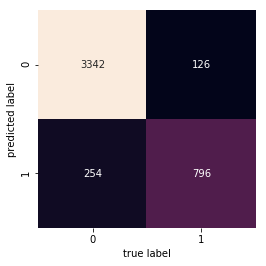

In [164]:
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [165]:
print(metrics.accuracy_score( y_test, y_pred_class))

0.915891987605135


## 2.Different type of jobs :

In [133]:
from sklearn.decomposition import LatentDirichletAllocation

In [135]:
data_clean['Title'].isnull().value_counts()

False    18868
True        28
Name: Title, dtype: int64

In [136]:
data_set_2 = data_clean['Title']

In [137]:
data_set_2.dropna(inplace=True)

In [139]:
# Creating Tf-idf matix
vect_tfidf = TfidfVectorizer(max_df=.95,min_df=0.01,stop_words='english',token_pattern='(?u)\\b[a-zA-Z]\\w\\w+\\b')
data_tfidf = vect_tfidf.fit_transform(data_set_2)
data_tfidf
print(data_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [140]:
lda_model = LatentDirichletAllocation(n_components=7,learning_method='online',max_iter=20)

In [141]:
X_topics = lda_model.fit_transform(data_tfidf)

In [142]:
topic_words = lda_model.components_

In [143]:
vocab = vect_tfidf.get_feature_names()

In [146]:
n_top_words = 8
topic_summaries = []
for i,topic_dist in enumerate(topic_words):
    topic_word=np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_word))

In [147]:
topic_summaries

['engineer department head chief expert division management accountant',
 'sales officer analyst financial program java credit chief',
 'assistant administrative representative medical technical service lawyer translator',
 'administrator finance unit office legal language php english',
 'specialist developer senior software director net executive java',
 'marketing accountant development designer web specialist developer senior',
 'manager project coordinator consultant branch business credit sales']

### Jobs:
    -> Manager or Head chief
    -> Sales and Analyst
    -> Lawyer
    -> Administrator
    -> Software developer
    -> Web developer
    -> Project coordinator

<strong>Trend of these, over the period of time :- </strong>

In [166]:
data_yr = data_clean[['Title','Year']]

In [167]:
data_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18896 entries, 0 to 19000
Data columns (total 2 columns):
Title    18868 non-null object
Year     18896 non-null int64
dtypes: int64(1), object(1)
memory usage: 442.9+ KB


In [168]:
data_yr['Year'].value_counts()

2012    2138
2015    1998
2013    1995
2014    1981
2008    1781
2011    1691
2007    1534
2010    1474
2009    1180
2005    1136
2006    1114
2004     874
Name: Year, dtype: int64

In [174]:
data_yr_04 = data_yr[data_yr['Year']==2004]
data_yr_05 = data_yr[data_yr['Year']==2005]
data_yr_06 = data_yr[data_yr['Year']==2006]
data_yr_07 = data_yr[data_yr['Year']==2007]
data_yr_08 = data_yr[data_yr['Year']==2008]
data_yr_09 = data_yr[data_yr['Year']==2009]
data_yr_10 = data_yr[data_yr['Year']==2010]
data_yr_11 = data_yr[data_yr['Year']==2011]
data_yr_12 = data_yr[data_yr['Year']==2012]
data_yr_13 = data_yr[data_yr['Year']==2013]
data_yr_14 = data_yr[data_yr['Year']==2014]
data_yr_15 = data_yr[data_yr['Year']==2015]

In [175]:
data_yr_07

,Title,Year
3129,Vehicle Coordinator,2007
3130,Telephone Operator,2007
3131,Telephone Operator,2007
3132,Study of The United States Institutes,2007
3133,Administrative Assistant/ Translator,2007
3134,Medical Representative in Armenia,2007
3135,POS (Point of Sales) Developer Agent,2007
3136,Communication/ PR manager,2007
3137,POS (Point of Sales) Help Desk Agent,2007
3138,Tester/ Quality Assurance Engineer,2007


In [237]:
count =  data_yr_15['Title'].str.count("Lawyer")         

In [238]:
count.value_counts()

0    1973
1      25
Name: Title, dtype: int64

In [316]:
count1 =  data_yr_15['Title'].str.count("Administrator")  
count2 =  data_yr_15['Title'].str.count("Software")  
count3 =  data_yr_15['Title'].str.count("Web")  
count4 =  data_yr_15['Title'].str.count("Coordinator")  
count5 =  data_yr_15['Title'].str.count("Manager")  
count6 =  data_yr_15['Title'].str.count("Sales")  

In [317]:
print(count1.value_counts())
print(count2.value_counts())
print(count3.value_counts())
print(count4.value_counts())
print(count5.value_counts())
print(count6.value_counts())

0    1956
1      42
Name: Title, dtype: int64
0    1908
1      89
2       1
Name: Title, dtype: int64
0    1945
1      53
Name: Title, dtype: int64
0    1941
1      57
Name: Title, dtype: int64
0    1693
1     304
2       1
Name: Title, dtype: int64
0    1908
1      87
2       3
Name: Title, dtype: int64


In [287]:
yr = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

In [318]:
lawyer_list = [6,11,17,15,18,21,16,16,35,29,23,25]
admin_list = [18,31,27,50,52,41,32,37,66,46,35,42]
soft_list = [20,76,85,99,106,57,87,126,139,93,117,99]
web_list = [36,27,18,21,39,14,27,27,64,59,55,53]
coo_list = [41,29,33,37,51,28,39,41,47,49,56,57]
man_list = [91,141,123,181,241,172,208,249,324,274,274,305]
sales_list = [28,51,43,63,95,69,68,79,127,104,100,90]

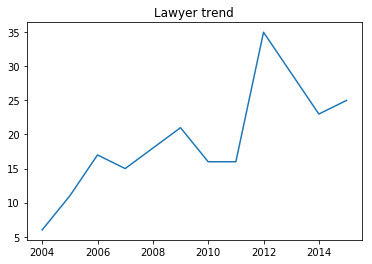

In [305]:
plt.plot(yr,lawyer_list)
plt.title('Lawyer trend')
plt.show()

In [ ]:
plt.plot(yr,lawyer_list)
plt.title('Lawyer trend')
plt.show()

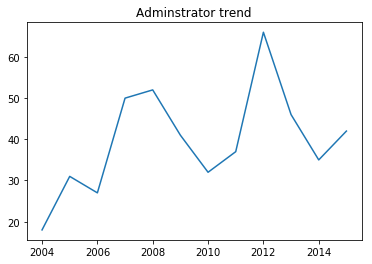

In [319]:
plt.plot(yr,admin_list)
plt.title('Adminstrator trend')
plt.show()

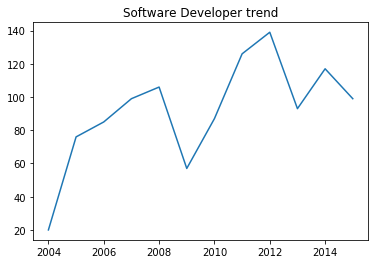

In [320]:
plt.plot(yr,soft_list)
plt.title('Software Developer trend')
plt.show()

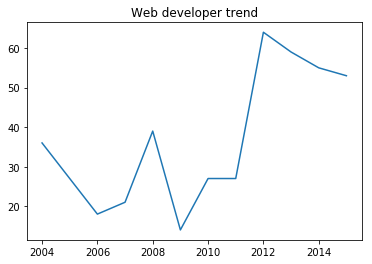

In [321]:
plt.plot(yr,web_list)
plt.title('Web developer trend')
plt.show()

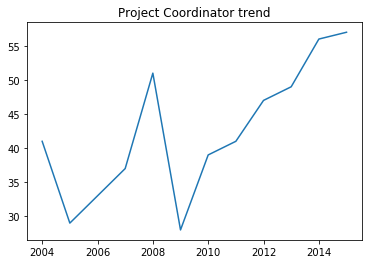

In [326]:
plt.plot(yr,coo_list)
plt.title('Project Coordinator trend')
plt.show()

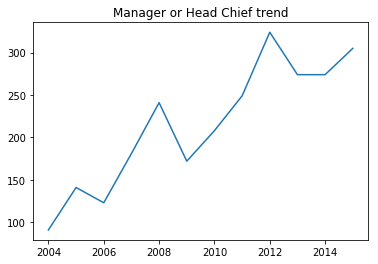

In [325]:
plt.plot(yr,man_list)
plt.title('Manager or Head Chief trend')
plt.show()

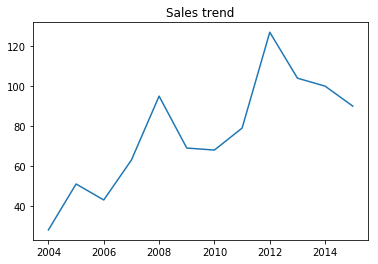

In [323]:
plt.plot(yr,sales_list)
plt.title('Sales trend')
plt.show()

## 3.Desired skill-set :

In [332]:
data_clean['RequiredQual'].isnull().value_counts()

False    18458
True       438
Name: RequiredQual, dtype: int64

In [333]:
data_set_3 = data_clean['RequiredQual']

In [334]:
data_set_3.dropna(inplace=True)

In [335]:
# Creating Tf-idf matix
vect_tfidf = TfidfVectorizer(max_df=.95,min_df=0.01,stop_words='english',token_pattern='(?u)\\b[a-zA-Z]\\w\\w+\\b')
data_tfidf = vect_tfidf.fit_transform(data_set_3)
data_tfidf
print(data_tfidf.toarray())

[[0.         0.05433437 0.12410851 ... 0.         0.         0.01942605]
 [0.         0.0860223  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.13817533]
 ...
 [0.         0.         0.         ... 0.         0.         0.13782466]
 [0.         0.         0.         ... 0.         0.1266115  0.        ]
 [0.         0.25398886 0.         ... 0.         0.10174854 0.        ]]


In [336]:
lda_model = LatentDirichletAllocation(n_components=7,learning_method='online',max_iter=20)

In [337]:
X_topics = lda_model.fit_transform(data_tfidf)

In [339]:
topic_words = lda_model.components_

In [340]:
vocab = vect_tfidf.get_feature_names()

In [341]:
n_top_words = 8
topic_summaries = []
for i,topic_dist in enumerate(topic_words):
    topic_word=np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_word))

In [342]:
topic_summaries

['knowledge experience development good design sql ability web',
 'license driving construction availability user valid car driver',
 'personality skills ability sales organized customer work oriented',
 'skills knowledge experience ability accounting work management excellent',
 'knowledge education russian higher languages field experience english',
 'ability french levels effectively journalism media state social',
 'skills knowledge excellent work excel word russian languages']

### Skill-sets:
    -> Sql and Designing
    -> Driving
    -> Sales
    -> Accounting
    -> Russian & English language 
    -> Journalism & Media 
    -> Excel & Word

<strong>Trend of these, over the period of time :- </strong>

In [343]:
data_yr = data_clean[['RequiredQual','Year']]

In [346]:
data_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18458 entries, 0 to 19000
Data columns (total 2 columns):
RequiredQual    18458 non-null object
Year            18458 non-null int64
dtypes: int64(1), object(1)
memory usage: 432.6+ KB


In [345]:
data_yr.dropna(inplace=True)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [347]:
data_yr_04 = data_yr[data_yr['Year']==2004]
data_yr_05 = data_yr[data_yr['Year']==2005]
data_yr_06 = data_yr[data_yr['Year']==2006]
data_yr_07 = data_yr[data_yr['Year']==2007]
data_yr_08 = data_yr[data_yr['Year']==2008]
data_yr_09 = data_yr[data_yr['Year']==2009]
data_yr_10 = data_yr[data_yr['Year']==2010]
data_yr_11 = data_yr[data_yr['Year']==2011]
data_yr_12 = data_yr[data_yr['Year']==2012]
data_yr_13 = data_yr[data_yr['Year']==2013]
data_yr_14 = data_yr[data_yr['Year']==2014]
data_yr_15 = data_yr[data_yr['Year']==2015]

In [572]:
count =  data_yr_10['RequiredQual'].str.count("drive")  

In [573]:
count.value_counts()

0    1407
1      31
Name: RequiredQual, dtype: int64

In [598]:
count1 =  data_yr_15['RequiredQual'].str.count("sales")  
count2 =  data_yr_15['RequiredQual'].str.count("accounting")  
count3 =  data_yr_15['RequiredQual'].str.count("Russian")  
count4 =  data_yr_15['RequiredQual'].str.count("media")  
count5 =  data_yr_15['RequiredQual'].str.count("Excel")  
count6 =  data_yr_15['RequiredQual'].str.count("designing")  

In [599]:
print(count1.value_counts())
print(count2.value_counts())
print(count3.value_counts())
print(count4.value_counts())
print(count5.value_counts())
print(count6.value_counts())

0    1829
1     105
2      25
3       4
4       3
Name: RequiredQual, dtype: int64
0    1849
1      73
2      31
3      10
4       3
Name: RequiredQual, dtype: int64
0    1075
1     879
2      10
3       2
Name: RequiredQual, dtype: int64
0    1866
1      83
2       7
3       6
4       2
6       1
5       1
Name: RequiredQual, dtype: int64
0    848
1    673
2    314
3     93
4     32
5      5
6      1
Name: RequiredQual, dtype: int64
0    1913
1      40
2      13
Name: RequiredQual, dtype: int64


In [601]:
yr = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

In [600]:
drive_list = [16,23,17,40,40,20,31,44,54,58,62,67]
sales_list = [12,41,18,39,85,114,109,106,125,126,112,137]
acc_list = [62,110,90,169,149,117,123,153,157,156,145,117]
russ_list = [319,431,512,690,750,495,667,786,1002,955,941,891]
media_list = [34,33,36,55,51,61,59,52,83,65,67,100]
excel_list = [327,491,537,841,894,641,848,1010,920,1152,1078,1118]
desig_list = [12,33,38,27,31,26,35,49,54,32,62,53]

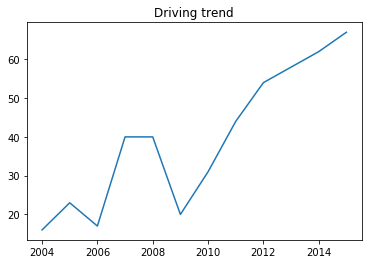

In [602]:
plt.plot(yr,drive_list)
plt.title('Driving trend')
plt.show()

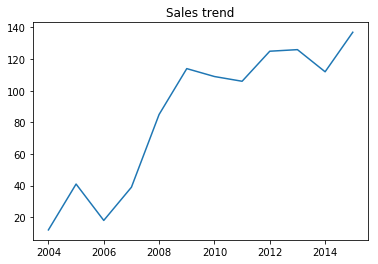

In [603]:
plt.plot(yr,sales_list)
plt.title('Sales trend')
plt.show()

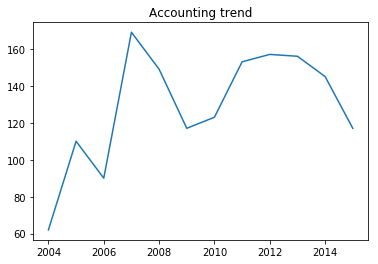

In [604]:
plt.plot(yr,acc_list)
plt.title('Accounting trend')
plt.show()

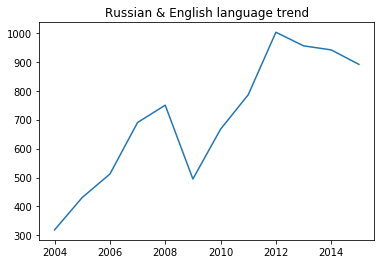

In [605]:
plt.plot(yr,russ_list)
plt.title('Russian & English language trend')
plt.show()

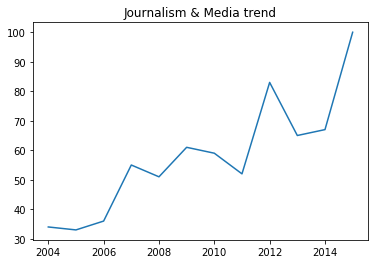

In [606]:
plt.plot(yr,media_list)
plt.title('Journalism & Media trend')
plt.show()

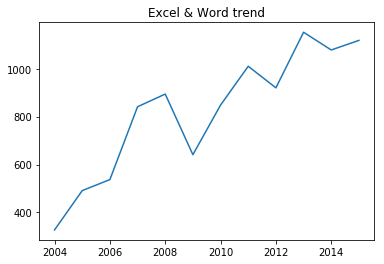

In [607]:
plt.plot(yr,excel_list)
plt.title('Excel & Word trend')
plt.show()

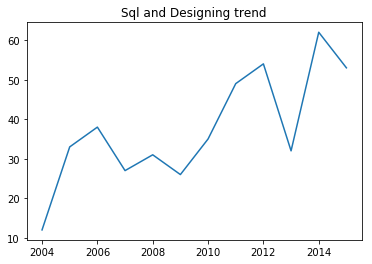

In [608]:
plt.plot(yr,desig_list)
plt.title('Sql and Designing trend')
plt.show()

## 4.Top 5 similar jobs :

In [394]:
from sklearn.metrics.pairwise import cosine_similarity

In [327]:
s = input('Enter job title')

Enter job titleweb developer


In [328]:
s

'web developer'

In [432]:
data_clean_4 = data[['Title','JobRequirment','jobpost']]

In [433]:
data_clean_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 3 columns):
Title            18973 non-null object
JobRequirment    16479 non-null object
jobpost          19001 non-null object
dtypes: object(3)
memory usage: 445.4+ KB


In [434]:
data_clean_4.dropna(inplace=True)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [435]:
data_clean_4.head()

,Title,JobRequirment,jobpost
0,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company\nJOB TITL...
2,Country Coordinator,- Working with the Country Director to provide...,Caucasus Environmental NGO Network (CENN)\nJOB...
3,BCC Specialist,- Identify gaps in knowledge and overseeing in...,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...
4,Software Developer,- Rendering technical assistance to Database M...,Yerevan Brandy Company\nJOB TITLE: Software D...
8,Assistant to Managing Director,- Coordinating the work of subordinate employe...,Yerevan Brandy Company \nJOB TITLE: Assistant...


<strong>For example I am seaching jobs similar to 'Sales' :-</strong>

In [436]:
data_clean_4['Title'].str.contains('Sales').value_counts()    

False    15611
True       848
Name: Title, dtype: int64

In [437]:
data_ftr = data_clean_4[data_clean_4['Title'].str.contains('Sales')]

In [438]:
data_ftr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 67 to 18999
Data columns (total 3 columns):
Title            848 non-null object
JobRequirment    848 non-null object
jobpost          848 non-null object
dtypes: object(3)
memory usage: 26.5+ KB


In [439]:
data_ftr.head()

,Title,JobRequirment,jobpost
67,Salesman / Trade agent,- To distribute and display imported confectio...,Interagent LLC\nJOB TITLE: Salesman / Trade a...
132,Sales & Marketing Specialist,The main responsibility is to secure the amoun...,Valensia Hotel & Resort\nJOB TITLE: Sales & ...
147,SalesMan - Advisor,- Work as a salesman in a car audio facilities...,ABSER Ltd.\nJOB TITLE: SalesMan - Advisor\nP...
148,Sales Technical Adviser,- Consulting clients with information on offer...,"""Digital Technologies"" LLC\nJOB TITLE: Sales..."
149,Sales Clerk/ Referent,- To welcome new clients;\n- Present informati...,"""Digital Technologies"" LLC\nJOB TITLE: Sales..."


In [440]:
data_ftr.iloc[0]

Title                                       Salesman / Trade agent
JobRequirment    - To distribute and display imported confectio...
jobpost          Interagent LLC\nJOB TITLE:  Salesman / Trade a...
Name: 67, dtype: object

In [441]:
# Creating Tf-idf matix
vect_tfidf = TfidfVectorizer(max_df=.95,min_df=0.01,stop_words='english',token_pattern='(?u)\\b[a-zA-Z]\\w\\w+\\b')
data_tfidf = vect_tfidf.fit_transform(data_ftr['JobRequirment'])
data_tfidf
print(data_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [442]:
print(cosine_similarity(data_tfidf, data_tfidf))

[[1.         0.         0.01453027 ... 0.06983178 0.01817979 0.01550113]
 [0.         1.         0.         ... 0.21908004 0.         0.        ]
 [0.01453027 0.         1.         ... 0.04626393 0.09724514 0.008729  ]
 ...
 [0.06983178 0.21908004 0.04626393 ... 1.         0.07805152 0.02341723]
 [0.01817979 0.         0.09724514 ... 0.07805152 1.         0.04475548]
 [0.01550113 0.         0.008729   ... 0.02341723 0.04475548 1.        ]]


In [443]:
cosine_tab = cosine_similarity(data_tfidf, data_tfidf)

In [444]:
cosine_tab.shape

(848, 848)

In [445]:
arr = cosine_tab[1]

In [446]:
arr

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05920803, 0.02852667, 0.        ,
       0.92318873, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03586493, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09189979, 0.03341879, 0.03794543, 0.0177408 ,
       0.01429325, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04418689, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06397284, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02144264, 0.     

In [447]:
top_6_idx = np.argsort(arr)[-6:]
top_6_values = [arr[i] for i in top_6_idx]

In [461]:
top_6_idx

array([522,  79, 845, 691,  10,   1], dtype=int64)

In [466]:
top_5_idx = top_6_idx[:-1]

In [462]:
top_6_values

[0.2043872990412786,
 0.21872543758021318,
 0.21908003840733972,
 0.2194746558951792,
 0.9231887329381612,
 1.0]

In [458]:
data_ftr.iloc[79][0]

'Sales Department Coordinator'

In [467]:
for i in top_5_idx:
    print(data_ftr.iloc[i][0])

Assistant to Director of Sales
Sales Department Coordinator
Director of Sales
Sales Manager
Sales & Marketing Specialist
